## <font color = '#0f0264'> <center> Referat laborator 09 </center></font>

Modificati titlul fisierului păstrând formatul acestuia, cu datele dvs:
- numar grupa
- nume
- prenume

Rulati codul indicat in celula de mai jos, care furnizeaza functia utilizata la afisarea formelor de unda ale marimilor electrice ale circuitelor analizate.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def draw_waveforms(wf1, wf2, title1, title2):
    '''
    functia afiseaza intr-un grid 2 linii x 1 coloana
    variatiile in timp (formele de unda) ale marimilor 
    wf1 si wf2;
      wf1, wf2       = marimile pentru care se afiseaza formele de unda
      title1, title2 = titlurile graficelor variatiilor marimilor electrice afisate 
    '''
    wfs    = (wf1, wf2)
    titles = (title1, title2)
    colors = ['black', 'blue']

    fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))
    
    for i,ax in enumerate(axs):
        ax.set_title(titles[i])
        ax.set_xlabel(f'Time[{wfs[i].abscissa.unit}]')
        ax.set_ylabel(f'Voltage[{wfs[i].unit}]')
        ax.grid('on', linewidth = 0.25, linestyle = '--', color = 'green')
        ax.plot( np.array(wfs[i].abscissa),  np.array(wfs[i]), color = colors[i])
     
    plt.tight_layout()

## 1. Amplificator de semnal mic cu tranzistor bipolar

#### 1.1. Determinarea Punctului Static de Functionare al tranzistorului bipolar

1. să se editeze circuitul de amplificare cu tranzistor bipolar, indicat in Figura 1; la iesirea acestuia, inca nu este conectata sarcina.

<img src = '904.png' width = 800 height = 600>
<p style="text-align: center;">Figura 1. Circuitul de amplificare cu tranzistor bipolar </p>

Elementele circuitului sunt:
- sursa $V_{CC}$ reprezinta o **sursa de tensiune continua** - sursa de polarizare a tranzistorului; valoarea tensiunii electrice generata de sursa $V_{CC}$, este indicata in Tabelul 1; 
- rezistoarele $R_{B1}, R_{B2}, R_C$ si $R_E$ sunt rezistoarele de polarizare ale tranzistorului; rolul acestora este de a stabili regiunea de functionare a tranzistorului; pentru a amplifica semnalele, tranzistorul bipolar trebuie sa functioneze in Regiunea Activa Normala (RAN);
- sursa $v_G$ reprezinta o **sursa de tensiune sinusoidala**; tensiunea electrica, generata de sursa $v_G$, reprezinta informatia aplicata la intrarea circuitului, pe care acesta o amplifica; parametrii tensiunii sinusoidale sunt:
  - valoare medie = $0[V]$;
  - amplitudine   = $500[mV]$ 
  - frecventa     = $1[kHz]$;
- rezistenta $R_g$ reprezinta rezistenta interna a sursei de tensiune $v_G$; $R_g = 4[k\Omega]$
- condensatorul $C_B$ decupleaza in regim de curent continuu, circuitul de polarizare al tranzistorului, compus din cele 4 rezistoare de polarizare si sursa de alimentare $V_{CC}$, de sursa de tensiune conectata la bornele de intrare ale amplificatorului, in scopul mentinerii valorii PSF-ului tranzistorului in RAN; $C_B = 100\mu F$ 

- pentru tranzistorul bipolar $Q$ se alege modelul indicat in Tabelul 2.


<p style="text-align: center;">Tabelul 1. Valorile componentelor amplificatorului </p>

|Numar   |VCC [V]      |RB2 [kOhm]   | RB1 [kOhm]  |RC [kOhm]    |RE [Ohm]     |  
|:------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
|1       |10           |47           |10           |1.2          |470          |
|2       |10           |51           |12           |1.4          |510          |
|3       |10           |56           |15           |1.8          |510          |
|4       |10           |62           |18           |2.2          |560          |
|5       |10           |69           |22           |2.7          |560          |
|6       |12           |47           |12           |1.2          |510          |
|7       |12           |56           |12           |1.2          |560          |
|8       |12           |62           |15           |1.5          |560          |
|9       |12           |69           |22           |1.5          |620          |
|10      |12           |71           |27           |2.2          |620          |
|11      |15           |47           |10           |1.5          |620          |
|12      |15           |62           |18           |1.8          |620          |
|13      |15           |69           |22           |1.8          |690          |
|14      |15           |71           |27           |2.2          |690          |
|15      |15           |82           |18           |2.7          |560          |
|16      |15           |91           |29           |2.7          |690          |
|17      |15           |100          |33           |2.7          |620          |
|18      |15           |120          |27           |2.2          |620          |
|19      |15           |150          |33           |2.2          |620          |
|20      |15           |180          |33           |2.2          |620          |

<p style="text-align: center;"> Tabelul 2. Parametrii modelului trazistorului bipolar </p>

|Numar   |Nume model tranzistor|BF    |IS[pA] |VCEO[V]|RB[Ohm]|RC[Ohm]|RE[Ohm]|CJE[pF]|CJC[pF]|
|:------:|:-------------------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|  
|1 - 5   |2N2222               |100   |0.01   | 30    |10     |0.3    |0.2    |25     |8      |
|6 - 10  |2N2369               |78    |0.04   | 15    |10     |0.6    |0.1    |4.5    |2.83   |
|11 - 20  |2N3904              |300   |0.01   | 40    |20     |0.1    |0.1    |8      |4      |

2. sa se simuleze circuitul din Figura 1 la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se analizeze circuitul astfel incat sa rezulte valorile marimilor electrice continue;
3. sa se determine Punctul Static de Functionare al tranzistorului ($I_C, V_{CE}$); determinarea valorii curentului $I_C$, se va realiza pe baza legii lui Ohm, aplicata rezistorului $R_C$;
4. pornind de la valoarea obtinuta pentru tensiunea $V_{CE}$, sa se verifice daca tranzistorul bipolar lucreaza in RAN; in cazul in care se constata ca tranzistorul nu lucreaza in RAN, circuitul descris contine erori (componente conectate gresit sau valori gresite pentru anumite componente); in acest caz, eroarea/erorile trebuie depistate si corectate, apoi se reia simularea circuitui si se extrag rezultatele nou obtinute.

In [9]:
# import utilitare

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np

# instanta circuit

circuit1 = Circuit('Amplificator de semnal mic cu tranzistor bipolar')

# model tranzistor

circuit1.model('2N2369', 'npn',
                BF = 78, IS=0.04@u_pA, VCEO = 15@u_V,
                RB = 10@u_Ohm, RC = 0.6@u_Ohm, RE = 0.1@u_Ohm,
                CJC = 4.5@u_pF, CJE = 2.83@u_pF)
# netlist

VG = circuit1.SinusoidalVoltageSource('G', 1,0,
                                     offset = 0@u_V,
                                     amplitude = 500@u_mV,
                                     frequency = 1@u_kHz)
RG = circuit1.R('G', 1,2, 4@u_kOhm)
CB = circuit1.C('B', 2,3, 100@u_uF)
RB1 = circuit1.R('B1', 3,0, 27@u_kOhm)
RB2 = circuit1.R('B2',3,4, 71@u_kOhm)
RC = circuit1.R('C', 4,5, 2.2@u_kOhm)
Q = circuit1.BJT('', 5,3,6, model = '2N2369')
RE = circuit1.R('E', 6,0, 620@u_Ohm)
VCC = circuit1.V('CC', 4,0, 12@u_V)

# afisare netlist

print(circuit1)

# instanta simulator

simulator1 = circuit1.simulator(temperature = 25, nominal_temperature = 25)

# analiza circuit si salvare rezultate analiza

analysis_op = simulator1.operating_point()

# curent continuu IC

VRC = analysis_op.nodes['4'] - analysis_op.nodes['5']

IC = VRC / RC.resistance # legea lui Ohm pentru RC

# tensiune continua VCE

VCE = analysis_op.nodes['5'] - analysis_op.nodes['6']

# afisare valoare P.S.F tranzistor
print('-'*10, 'PSF', '-'*10)

# verificare RAN:
print('-'*10, 'Verificare RAN', '-'*10)
ran_verif = 0.5 < VCE.item() < VCC.dc_value - 0.5
print(f'Q lucreaza in RAN: {"ADEVARAT" if ran_verif else "FALS"}')

.title Amplificator de semnal mic cu tranzistor bipolar
VG 1 0 DC 0V AC 1V SIN(0V 500mV 1kHz 0s 0Hz)
RG 1 2 4kOhm
CB 2 3 100uF
RB1 3 0 27kOhm
RB2 3 4 71kOhm
RC 4 5 2.2kOhm
Q 5 3 6 2N2369
RE 6 0 620Ohm
VCC 4 0 12V
.model 2N2369 npn (BF=78 CJC=4.5pF CJE=2.83pF IS=0.04pA RB=10Ohm RC=0.6Ohm RE=0.1Ohm VCEO=15V)

---------- PSF ----------
---------- Verificare RAN ----------
Q lucreaza in RAN: ADEVARAT


#### 1.2. Amplificarea in tensiune a amplificatorului neconectat la circuitele externe

1. sa se simuleze circuitul din Figura 1, la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 5
  - numar puncte simulare, *POINTS* = 500
2. sa se determine tensiunea de intrare $v_I$ in amplificator, respectiv tensiunea de iesire $v_O$ din amplificator; tensiunea de iesire a amplificatorului este masurata din colectorul tranzistorului la masa circuitului (asa cum este afisat in Figura 1);
3. sa se determine **amplitudinea** tensiunii de intrare $v_I$, respectiv **amplitudinea** tensiunii de iesire $v_O$, ale amplificatorului;
4. sa se determine modulul amplificarii in tensiune $|A_V|$, a amplificatorului;
5. sa se calculeze cu formula din documentatia laboratorului, valoarea teoretica a modulului amplificarii in tensiune $|A_{Vteoretic}|$ a amplificatorului;
6. sa se afiseze rezultatele obtinute;
7. sa se vizualizeze formele de unda ale tensiunii de intrare $v_I$, respectiv tensiunii de iesire $v_O$, ale amplificatorului; in acest scop, se va apela functia `draw_waveforms()`, implementata la inceputul laboratorului; pentru parametrii *title1*, *title2* se vor da denumiri care descriu semnificatia tensiunilor electrice afisate (ex. 'Tensiune intrare', 'Tensiune iesire', etc.)

Vi = 0.4999 V 
Vo = 0.3836 V 
AV = 0.7674 
AV_teoretic = 0.0002


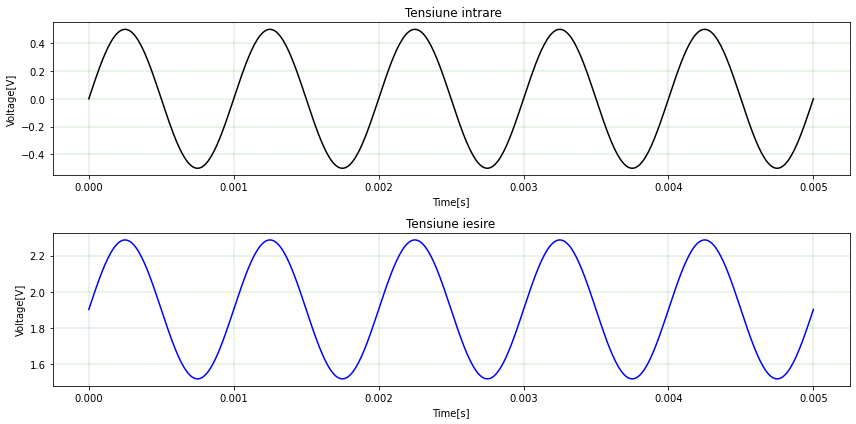

In [10]:
# analiza circuit si salvare rezultate analiza
N            = 5
POINTS       = 500
PERIOD       =  VG.period
analysis_tr1 =  simulator1.transient(end_time = N*PERIOD, step_time = N*PERIOD/POINTS ) # se utilizeaza "simulator1"

# extragere tensiune de intrare vI
vI_wf = analysis_tr1.nodes['1']

# extragere tensiune de iesire vO
vO_wf = analysis_tr1.nodes['6']

# calcul amplitudine Vi

Vi = (vI_wf.max() - vI_wf.min() )/2

# calcul amplitudine Vo
Vo = (vO_wf.max() - vO_wf.min()) /2

# calcul amplificare tensiune

AV = Vo / Vi

# afisare amplitudine Vi (valoare numerica + unitate masura)

print(f'Vi = {np.round(Vi.item(),4)} {Vi.unit} ')

# afisare amplitudine Vo (valoare numerica + unitate masura)

print(f'Vo = {np.round(Vo.item(),4)} {Vo.unit} ')

# afisare AV (valoare numerica)

print(f'AV = {np.round(AV.item(),4)} ')

# afisare AV_teoretic (valoare numerica)
VT = 25@u_mV
BF = 78
rp = (BF * VT) / IC
AV_teoretic = (BF * RC.resistance) / (rp.value + (1 + BF) * RE.resistance) 

print(f'AV_teoretic = {np.round(AV_teoretic.value,4)}')

# afisare forme unda vi, vo
draw_waveforms(vI_wf,vO_wf,' Tensiune intrare', 'Tensiune iesire')

#### 1.3. Determinarea rezistentei de intrare a amplificatorului 

Se observa de la punctul precedent ca amplitudinea tensiunii $v_I$, care se aplica la intrarea amplificatorului, este mai mica decat amplitudinea tensiunii $v_G$, furnizata de catre generatorul de semnal $v_G$. Cauza scaderii valorii tensiunii electrice la intrarea amplificatorului este rezistenta de intrare finita a acestuia, care determina o pierdere a tensiunii $v_G$ pe rezistenta interna $R_g$ a generatorului de tensiune.

1. sa se determine valoarea rezistentei de intrare in circuit, $R_i$;  formula de calcul pentru determinarea valorii $R_i$ in urma masuratorilor pe circuit este:

$$R_i = R_g \cdot \frac{V_i}{V_g-V_i}$$

unde $V_g$ si $V_i$ sunt amplitudinile tensiunilor $v_G$ si $v_I$, iar $R_g$ este rezistenta sursei de tensiune $v_G$.

**Observatie**: In calculul rezistentei $R_i$, valoarea si unitatea de masura ale rezistentei $R_g$ se vor atribui explicit unei variabile *Rg_resistance*; ulterior, valoarea acestei variabile se va utiliza in expresia de calcul a rezistentei $R_i$.

2. sa se determine valoarea teoretica a rezistentei de intrare in circuit, $R_{i-teoretic}$ (formula de calcul este indicata in documentatia laboratorului);
3. sa se afiseze rezultatele obtinute pentru rezistenta de intrare.

In [14]:
# valoare numerica + unitate masura rezistenta Rg
Rg_resistance = 4@u_kOhm 

# calcul rezistenta intrare Ri

Ri = Rg_resistance * Vi / (Vi - Vo)

# afisare valoare Ri (valoare numerica + unitate masura)

print(f'Ri = {np.round(Ri.value,4)} {Ri.unit} ')

# afisare valoare Ri_teoretic (valoare numerica + unitate masura)

RB = (RB1.resistance + RB2.resistance) / ( RB1.resistance * RB2.resistance )/1000
Ri_teoretic = RB.value * (rp.value + (1 + BF) * RE.resistance) / ( RB.value + rp.value + ( 1 + BF) * RE.resistance) 
print(f'Ri_teoretic = {np.round(Ri_teoretic,4)} {Ri.unit}')


Ri = 17.1979 Ω 
Ri_teoretic = 0.0 Ω


#### 1.4. Determinarea amplificarii in tensiune a amplificatorului conectat la circuitele externe
Prin conectarea amplificatorului la circuitele externe, valoarea amplificarii scade.

1. să se editeze circuitul indicat in Figura 2; in acest caz, amplificatorul este conectat la sarcina $R_L = 22[k\Omega]$, prin intermediul condensatorului de decuplare in curent continuu, $C_L = 100 \mu F$, care are rolul de a izola circuitul de polarizare de sarcina $R_L$, pentru a pastra functionarea tranzistorului in RAN; celelalte elemente de circuit pastreaza valorile valabile pentru Figura 1.

<img src = '905.png' width = 800 height = 600>
<p style="text-align: center;">Figura 2. Circuitul de amplificare cu tranzistor bipolar conectat la sarcina </p>

2. sa se simuleze circuitul din Figura 2, la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 5
  - numar puncte simulare, *POINTS* = 500
3. sa se determine tensiunea de intrare $v_G$ in circuit, respectiv tensiunea pe sarcina circuitului $v_L$;
4. sa se determine **amplitudinea** tensiunii de intrare $v_G$, respectiv **amplitudinea** tensiunii pe sarcina $v_L$;
5. sa se determine modulul amplificarii in tensiune $|A_{Vg}|$, a intregului circuit;
6. sa se calculeze cu formula din documentatia laboratorului, valoarea teoretica a modulului amplificarii in tensiune $|A_{Vg-teoretic}|$ a intregului circuit;
7. sa se afiseze rezultatele obtinute;
8. sa se vizualizeze formele de unda ale tensiunii de intrare $v_G$, respectiv tensiunii pe  sarcina $v_L$ ale circuitului; in acest scop, se va apela functia `draw_waveforms()`, implementata la inceputul laboratorului; se observa ca amplificarea in tensiune a amplificatorului conectat la circuitele externe este mai mica decat amplificarea in tensiune, calculata pentru circuitul de amplificare neconectat la elementele externe (generator $v_G$ si sarcina $R_L$); pentru parametrii *title1*, *title2* se vor da denumiri care descriu semnificatia tensiunilor electrice afisate (ex. 'Tensiune intrare', 'Tensiune iesire', etc.)

.title Determinarea amplificarii in tensiune a amplificatorului conectat la circuitele externe
VG 1 0 DC 0V AC 1V SIN(0V 500mV 1kHz 0s 0Hz)
RG 1 2 4kOhm
CB 2 3 100uF
RB1 3 0 27kOhm
RB2 3 4 71kOhm
RC 4 5 2.2kOhm
Q 5 3 6 2N2369
RE 6 0 620Ohm
VCC 4 0 12V
RL 7 0 22kOhm
CL 5 7 100uF
.model 2N2369 npn (BF=78 CJC=4.5pF CJE=2.83pF IS=0.04pA RB=10Ohm RC=0.6Ohm RE=0.1Ohm VCEO=15V)

Vg = 0.4999 V 
Vl = 1.2219 V 
AVg = nan
AVg_teoretic = 0.2854


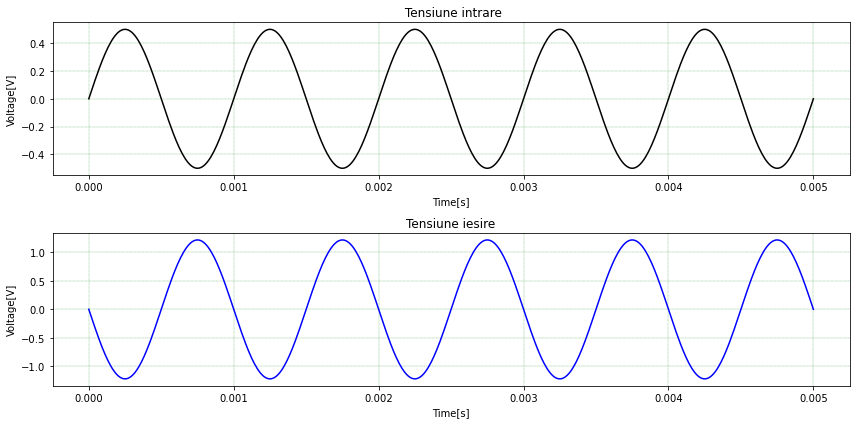

In [15]:
# import utilitare

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np

# instanta circuit

circuit2 = Circuit('Determinarea amplificarii in tensiune a amplificatorului conectat la circuitele externe')

# model tranzistor

circuit2.model('2N2369', 'npn',
                BF = 78, IS=0.04@u_pA, VCEO = 15@u_V,
                RB = 10@u_Ohm, RC = 0.6@u_Ohm, RE = 0.1@u_Ohm,
                CJC = 4.5@u_pF, CJE = 2.83@u_pF)

# netlist

VG = circuit2.SinusoidalVoltageSource('G', 1,0,
                                     offset = 0@u_V,
                                     amplitude = 500@u_mV,
                                     frequency = 1@u_kHz)
RG = circuit2.R('G', 1,2, 4@u_kOhm)
CB = circuit2.C('B', 2,3, 100@u_uF)
RB1 = circuit2.R('B1', 3,0, 27@u_kOhm)
RB2 = circuit2.R('B2',3,4, 71@u_kOhm)
RC = circuit2.R('C', 4,5, 2.2@u_kOhm)
Q = circuit2.BJT('', 5,3,6, model = '2N2369')
RE = circuit2.R('E', 6,0, 620@u_Ohm)
VCC = circuit2.V('CC', 4,0, 12@u_V)
RL = circuit2.R('L', 7,0, 22@u_kOhm)
CL = circuit2.C('L', 5,7, 100@u_uF)

# afisare netlist

print(circuit2)

# instanta simulator

simulator2 = circuit2.simulator(temperature = 25, nominal_temperature = 25)

# analiza circuit si salvare rezultate analiza

N            = 5
POINTS       = 500
PERIOD       = VG.period
analysis_tr1 = simulator2.transient(end_time = N*PERIOD, step_time = N*PERIOD/POINTS ) # se utilizeaza "simulator1"

# extragere tensiune de intrare vG

vG_wf = analysis_tr1.nodes['1']

# extragere tensiune sarcina vL

vL_wf = analysis_tr1.nodes['7']

# amplitudine Vg

Vg = (vG_wf.max() - vG_wf.min() )/2 # se atribuie explicit valoarea si unitatea de masura ale amplitudinii Vg

# calcul amplitudine Vl

Vl = (vL_wf.max() - vL_wf.min() )/2

# calcul amplificare tensiune
Avg = max(abs(vL_wf / vG_wf) )

# afisare amplitudine Vg (valoare numerica + unitate masura)

print(f'Vg = {np.round(Vg.item(),4)} {Vg.unit} ')

# afisare amplitudine Vl (valoare numerica + unitate masura)

print(f'Vl = {np.round(Vl.item(),4)} {Vl.unit} ')

# afisare AVg (valoare numerica)

print (f'AVg = {np.round(Avg.value,4)}')

# afisare AVg_teoretic (valoare numerica)

Ri = Rg_resistance * Vi / (Vl - Vg)
Ro = RC.resistance
AVg_teoretic = (Ri / (Ri + RG.resistance)) * ( RL.resistance / ( RL.resistance + Ro)) * AV
print (f'AVg_teoretic = {np.round(AVg_teoretic.value,4)}')

# afisare forme unda vG, vL
draw_waveforms(vG_wf,vL_wf,' Tensiune intrare', 'Tensiune iesire')

#### 1.5. Determinarea amplificarii in curent 
1. pe baza rezultatelor obtinute in urma simularii circuitului din Figura 1, sa se calculeze valoarea modului amplificarii in curent a amplificatorului, $|A_I|$, in conditiile in care acesta nu este conectat la circuitele externe; pentru calculul valorii amplificarii in curent, se va utiliza relatia:

$$|A_I| = |A_V| \cdot \frac{R_i}{R_o}$$

unde:
- $R_i$ este rezistenta de intrare, determinata la punctul 1.3; este un obiect `Waveform` - in relatia de calcul se foloseste obiectul `Waveform` 
- $R_o$ este rezistenta de iesire; valoare acesteia se determinata dupa relatia din documentatia laboratorului si se atribuie unei variabile *Ro*;
- $|A_V|$ este modulul amplificarii in tensiune, determinat la punctul 1.2;

2. pe baza rezultatelor obtinute in urma simularii circuitului din Figura 1, sa se calculeze valoarea modului amplificarii reale in curent a amplificatorului, $|A_{Ig}|$, in conditiile in care acesta este conectat la circuitele externe; pentru calculul valorii amplificarii reale in curent, se va utiliza relatia:

$$|A_{Ig}| = |A_{Vg}| \cdot \frac{R_g}{R_L}$$

unde:
- $R_g$ este rezistenta generatorului de tensiune $v_G$;
- $R_L$ este rezistenta de sarcina; 
- $|A_{Vg}|$ este modulul amplificarea reala in tensiune, determinat la punctul 1.4;

**Observatie**: In calculul amplificarii $|A_{Ig}|$, valoarea si unitatea de masura ale rezistentei $R_g$ se vor atribui explicit unei variabile *Rg_resistance*, respectiv valoarea si unitatea de masura ale rezistentei $R_L$ se vor atribui explicit unei variabile *RL_resistance*; valorile acestor variabile se vor utiliza in expresia de calcul a amplificarii $|A_{Ig}|$.

1. pe baza formulelor teoretice, prezentate in documentatia laboratorului, sa se calculeze valoarea modului amplificarii in curent a amplificatorului, $|A_{I-teoretic}|$, in conditiile in care acesta nu este conectat la circuitele externe;
2. pe baza formulelor teoretice, prezentate in documentatia laboratorului, sa se calculeze valoarea modului amplificarii in curent a amplificatorului, $|A_{Ig-teoretic}|$, in conditiile in care acesta este conectat la circuitele externe.

In [17]:
# valoare numerica + unitate masura rezistenta Ro
Ro = 2.2@u_kOhm 

# calcul AI
AI =( Vg / Vl) * (Ri / Ro)

# valoare numerica + unitate masura rezistenta Rg si RL
Rg_resistance = 4@u_kOhm 
RL_resistance = 22@u_kOhm 

# calcul AIg
AIg = Avg * Rg_resistance / RL_resistance

# afisare AI (valoare numerica)

print ( f'AI = {np.round(AI,4)}')

# afisare AIg (valoare numerica)

print ( f'AIg = {AIg}')

# afisare AI_teoretic (valoare numerica)

AI_teoretic = AV * Ri / Ro
print(f'AI_teoretic = {np.round(AI_teoretic,4)}')

# afisare AIg_teoretic (valoare numerica)

AIg_teoretic = (Rg_resistance / (Ri + Rg_resistance)) * (Ro / (RL.resistance + Ro)) * AI_teoretic 
print(f'AIg_teoretic = {np.round(AIg_teoretic.value,4)}')


AI = 0.5151
AIg = nan sr
AI_teoretic = 0.9661
AIg_teoretic = 0.0519
